In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [3]:
# Import data

In [ ]:
train_gen = ImageDataGenerator(validation_split=0.20)

In [13]:
train_generator = train_gen.flow_from_directory(directory="..Desktop/Data Science Assignment group/cat and dog/train_set",
                                     target_size=(224, 224), batch_size=32,
                                     shuffle=True,subset='training')

NameError: name 'train_gen' is not defined

In [ ]:
val_gen = train_gen.flow_from_directory(directory='../Data Science Assignment group/cat and dog/train_set',
                                      target_size=(224, 224), batch_size=32,
                                      shuffle=True, subset='validation')

# Config finetune model

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=True,
                  input_shape=(224, 224, 3))

In [ ]:
ft_model = Sequential()
for layer in VGG_model.layers:
  layer.trainable=False
  ft_model.add(layer)

ft_model.pop()

In [ ]:
ft_model.summary()

In [ ]:
ft_model.add(Dense(2048, activation='ReLU'))
ft_model.add(Dropout(0.5))
ft_model.add(Dense(23, activation='softmax'))
ft_model.summary()

In [ ]:
ft_model.compile(optimizer='adam', loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
num_epoch = 10
ft_model.fit_generator(train_generator, epochs=num_epoch, 
                       validation_data=val_gen)

In [ ]:
ft_model.save('ft_model.h5')

In [ ]:
test_gen = ImageDataGenerator()

In [ ]:
test_generator = test_gen.flow_from_directory(directory='../Data Science Assignment group/cat and dog/train_set',
                                      target_size=(224, 224), batch_size=16,
                                      shuffle=False, class_mode=None)

In [9]:
true_name = ['abyssinian','american shorthair','beagle','boxer','bulldog','chihuahua','corgi','dachshund','german shepherd','golden retriever','husky','labrador','maine coon','mumbai cat',
             'persian cat','pomeranian','pug','ragdoll cat','rottwiler','shiba inu','siamese cat','sphynx','yorkshire terrier']

In [10]:
labels = []

for y in test_generator.classes:
    labels.append(y)

## Encode classes

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [15]:
le.fit(true_name)
le.transform(true_name)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [ ]:
new_label = le.inverse_transform(labels)
# print(new_label)

<Figure size 1296x1296 with 0 Axes>

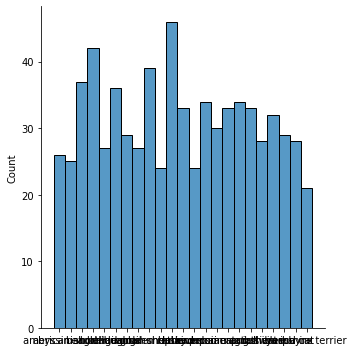

In [20]:
plt.figure(figsize = (18,18))
sns.displot(new_label)
plt.show()

## Plot result 

In [25]:
model_hist = ft_model.predict(test_generator)

2021-12-15 06:43:29.257844: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-15 06:43:30.446884: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [6]:
labels=(test_generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
print(labels)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22}


In [26]:
pred_ft = [np.argmax(y, axis=None, out=None) for y in model_hist]

In [27]:
pred_labels = le.inverse_transform(pred_ft)

In [31]:
cm = confusion_matrix(new_label, pred_labels)

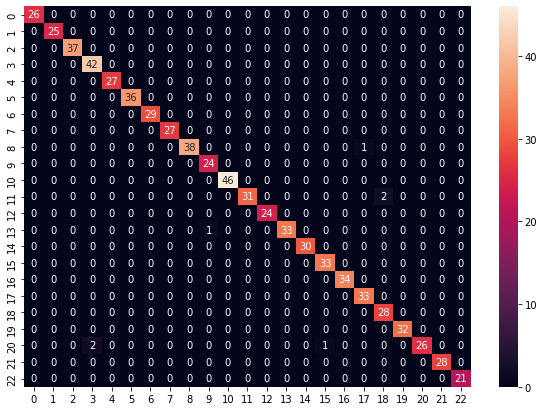

In [32]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.show()

In [33]:
print(classification_report(new_label,pred_labels))

                    precision    recall  f1-score   support

        abyssinian       1.00      1.00      1.00        26
american shorthair       1.00      1.00      1.00        25
            beagle       1.00      1.00      1.00        37
             boxer       0.95      1.00      0.98        42
           bulldog       1.00      1.00      1.00        27
         chihuahua       1.00      1.00      1.00        36
             corgi       1.00      1.00      1.00        29
         dachshund       1.00      1.00      1.00        27
   german shepherd       1.00      0.97      0.99        39
  golden retriever       0.96      1.00      0.98        24
             husky       1.00      1.00      1.00        46
          labrador       1.00      0.94      0.97        33
        maine coon       1.00      1.00      1.00        24
        mumbai cat       1.00      0.97      0.99        34
       persian cat       1.00      1.00      1.00        30
        pomeranian       0.97      1.00

In [23]:
import keras

In [ ]:
ft_model = keras.models.load_model('../input/23-dog-and-cat-breads/Trained_VGG16.h5')

## Visualize